# Task :
- Predict whether income exceeds 50K/yr based on census data. Also known as "Census Income" dataset, from the 1994 Census database.
- https://archive.ics.uci.edu/ml/datasets/Adult

#### Varibale Information

- age – The age of the individual. This is continuous attribute.

- type_employer – The type of the employer that the individual has. This is nominal attribute. The levels of the       attributes: Federal-gov, Local-gov, Never-worked, Private, Self-emp-inc, Self-emp-not-inc, State-gov, and Without-   pay.

- fnlwgt – Final sampling weight. The number of people the census takers believe that observation represents.           Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groupsThis is         continuous attribute.

- education – The highest level of education achieved for that individual. This is nominal attribute. The ordered       levels of the attributes: Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-       school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate.

- education_num – Highest level of education in numerical form. This is continuous attribute.

- marital – Marital status of the individual. This is nominal attribute. The levels of the attributes: Divorced,       Married-AF-spouse, Married-civ-spouse, Married-spouse-absent, Never-married, Separated, and Widowed.

- occupation – The occupation of the individual. This is nominal attribute. The levels of the attributes: Adm-         clerical, Armed-Forces, Craft-repair, Exec-managerial, Farming-fishing, Handlers-cleaners, Machine-op-inspct,    Other-service, Priv-house-serv, Prof-specialty, Protective-serv, Sales, Tech-support, and Transport-moving.

- relationship – The family relationship of the individual. This is nominal attribute. The levels of the attributes: Husband, Not-in-family, Other-relative, Own-child, Unmarried, and Wife.

- race – The descriptions of the individuals race. This is nominal attribute. The levels of the attributes: Amer-Indian-Eskimo, Asian-Pac-Islander, Black, Other, and White.

- sex – Biological Sex. This is nominal attribute. The levels of the attributes: Female and Male.

- capital_gain – Capital gains recorded. This is continuous attribute.

- capital_loss – Capital Losses recorded. This is continuous attribute.

- hr_per_week – Hours worked per week. This is continuous attribute.

- country – Country of origin for person. This is nominal attribute. The levels of the attributes: Cambodia, Canada, China, Columbia, Cuba, Dominican-Republic, Ecuador, El-Salvador, England, France, Germany, Greece, Guatemala, Haiti, Holand-Netherlands, Honduras, Hong, Hungary, India, Iran, Ireland, Italy, Jamaica, Japan, Laos, Mexico, Nicaragua, Outlying-US(Guam-USVI-etc), Peru, Philippines, Poland, Portugal, Puerto-Rico, Scotland, South, Taiwan, Thailand, Trinadad&Tobago, United-States, Vietnam, and Yugoslavia.

- income – Whether or not the person makes more than $50,000/year income. This is nominal attribute. The levels of the attributes: <=50K, and >50K.

### Importing Required Libraries & Reading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
import missingno as msno 
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('Adult.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0,40,Cuba,<=50K


<=50K    24720
>50K      7841
Name: Target, dtype: int64


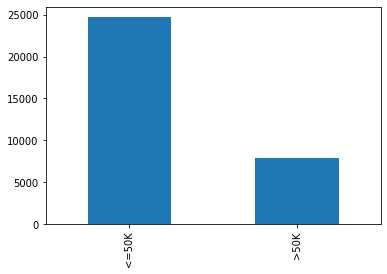

In [3]:
print(df['Target'].value_counts())
df['Target'].value_counts().plot(kind='bar')

formatter = {'<=50K':0 , '>50K':1}
df['Target'] = df['Target'].map(formatter)

#### Check Null Values in the dataset

In [4]:
null_count = df.isnull().sum()
null_count[null_count > 0]

education       16
capital_gain    17
dtype: int64

#### Plot pairwise relationships in a dataset among all variables
- distribution of the variable age is right-skewed especially in the low-income groups (annual income <= 50K)
- Also, median age of high-income group is higher, which implies the older generation has more wealth than the younger generation.
- No significant difference between two income communities in the variable fnlwgt
- education_num ,lot of people with long-term education carrer but still gainning low annual income.
- capital gain, gap between the two income groups is huge.

/usr/local/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


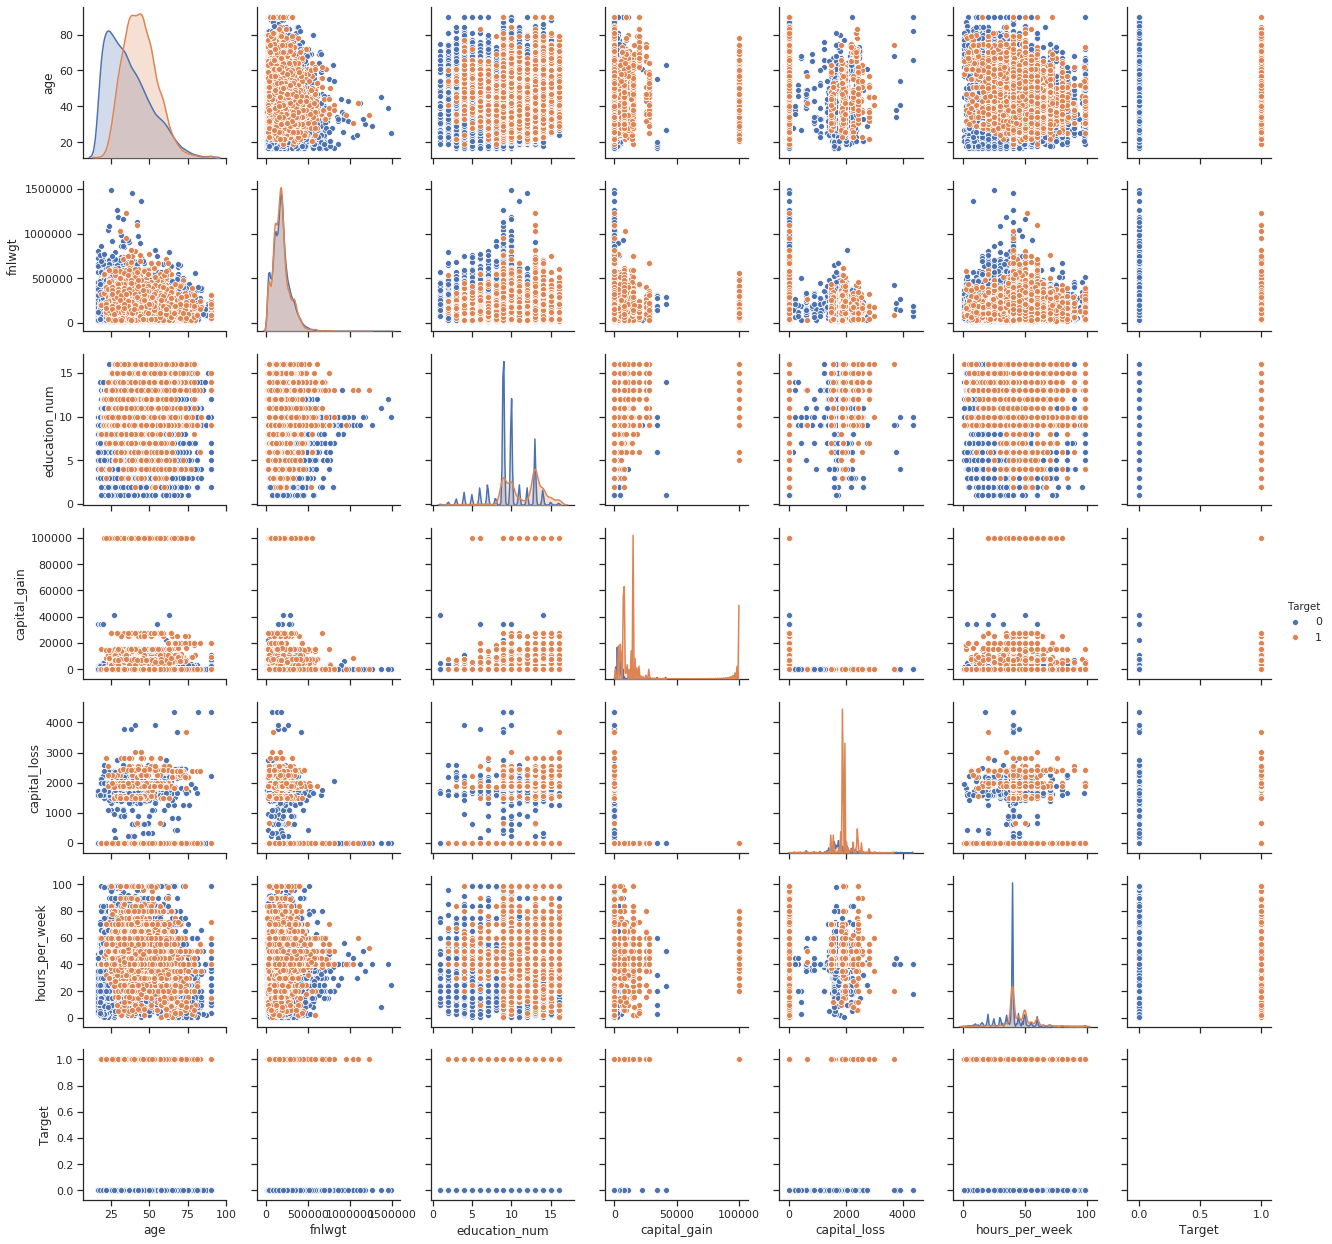

In [44]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, hue="Target")

#### Let's see unique values within each Categorical variable 
- We will see its cardinality level 
- Further we will have to transform our Categorical values into Numerical values

In [5]:
for each_col in df.columns:
    if df[each_col].dtypes == 'object':
        unique_cat = len(df[each_col].unique())
        print(f"Variable : '{each_col}' has {unique_cat} Unique categories")

Variable : 'workclass' has 9 Unique categories
Variable : 'education' has 17 Unique categories
Variable : 'marital_status' has 7 Unique categories
Variable : 'occupation' has 15 Unique categories
Variable : 'relationship' has 6 Unique categories
Variable : 'race' has 5 Unique categories
Variable : 'sex' has 2 Unique categories
Variable : 'native_country' has 42 Unique categories


## Feature Engineering 
- Binnig 
- Null Value Imputation : We will impute Null values with median and mode
- See the distribution of both the target classes in eacg categorical dataset

In [6]:
def variable_wise_distribution(df, column_name):
    column_name_status_distribution = df.groupby([column_name,"Target"])["Target"].count().reset_index(name="mean_contribution")
    above = column_name_status_distribution[column_name_status_distribution['Target']==0]
    below = column_name_status_distribution[column_name_status_distribution['Target']==1]
    
    above['distribution'] = above['mean_contribution']/df['Target'].value_counts()[0]
    above = above[[column_name,'Target','distribution']]
    
    below['distribution'] = below['mean_contribution']/df['Target'].value_counts()[1]
    below = below[[column_name,'Target','distribution']]

    plt.figure(figsize=(19,5))
    sns.countplot(data=df, x= column_name, hue="Target" )
    
    combined_df = above.merge(below, on = column_name, how='inner')
    return combined_df[[column_name,'Target_x','distribution_x','Target_y','distribution_y']].sort_values('distribution_y',ascending=False)

- We can clearly see that, majority of the workclass is private. 
- And also within private class, data imbalance is seen.
- Also, only 1/4 of the total observation have earned more than 50K a year.

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,workclass,Target_x,distribution_x,Target_y,distribution_y
1,private,0,0.783900,1,0.657314
2,self_employed,0,0.093487,1,0.171662
0,govt_employee,0,0.121764,1,0.171024


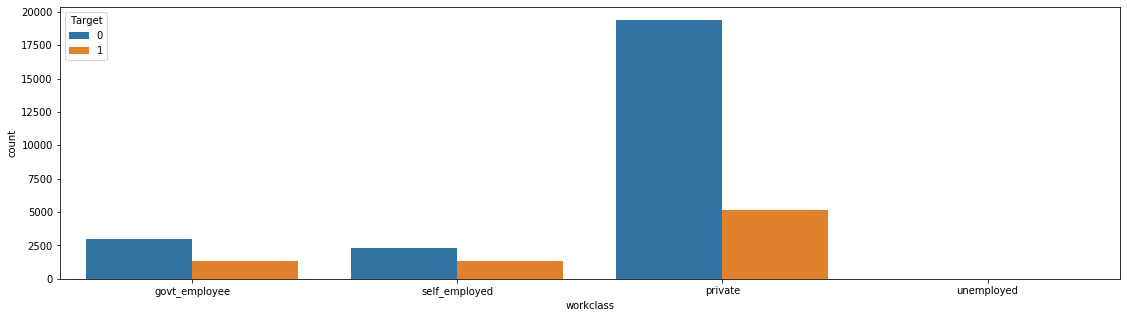

In [7]:
'''
Incorporated self employment: Refers to people who work for themselves in corporate entities. 
Unincorporated self employment: Refers to people who work for themselves in other legal entities.
'''

df['workclass'] = np.where(df['workclass'] == '?', df['workclass'].mode()[0], df['workclass'])

replace_values = {'Private' : 'private', 'Self-emp-not-inc' : 'self_employed', 
                  'Self-emp-inc' : 'self_employed', 'Local-gov' : 'govt_employee',
                  'State-gov' : 'govt_employee', 'Federal-gov' : 'govt_employee',
                  'Without-pay' : 'unemployed', 'Never-worked' : 'unemployed'}

df.replace({'workclass' : replace_values },inplace=True)

variable_wise_distribution(df, 'workclass')

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,education,Target_x,distribution_x,Target_y,distribution_y
2,junior_college,0,0.365615,1,0.459890
5,some_school,0,0.363390,1,0.268206
3,masters,0,0.030906,1,0.122178
0,associate_cert,0,0.073746,1,0.079709
1,doctorate,0,0.004328,1,0.038898
4,school_dropout,0,0.162015,1,0.031118


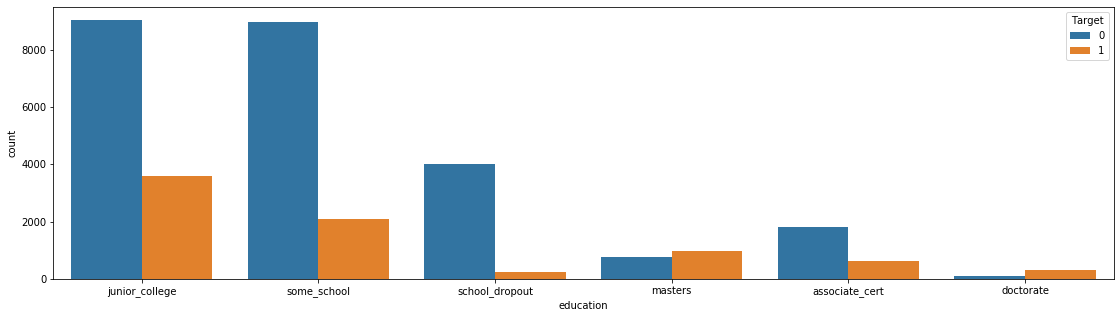

In [8]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

education_level = []
for x in df['education']:
    if x in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
        education_level.append('school_dropout')
    if x in ['HS-grad', 'Prof-school']:
        education_level.append('some_school')
    if x in ['Assoc-acdm', 'Assoc-voc']:
        education_level.append('associate_cert')
    if x in ['Some-college', 'Bachelors']:
        education_level.append('junior_college')
    if x == 'Masters':
        education_level.append('masters')
    if x == 'Doctorate':
        education_level.append('doctorate')
    #else:
    #    education_level.append(np.nan)
        
df['education'] = education_level

variable_wise_distribution(df,'education')

- Most of the high income people are married couples.
- Major chunk of all the sample, never-married and divorced group earns less than 50K a year.

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,marital_status,Target_x,distribution_x,Target_y,distribution_y
2,Married-civ-spouse,0,0.335113,1,0.853463
4,Never-married,0,0.412298,1,0.062620
0,Divorced,0,0.161003,1,0.059049
6,Widowed,0,0.036731,1,0.010840
5,Separated,0,0.038794,1,0.008417
3,Married-spouse-absent,0,0.015534,1,0.004336
1,Married-AF-spouse,0,0.000526,1,0.001275


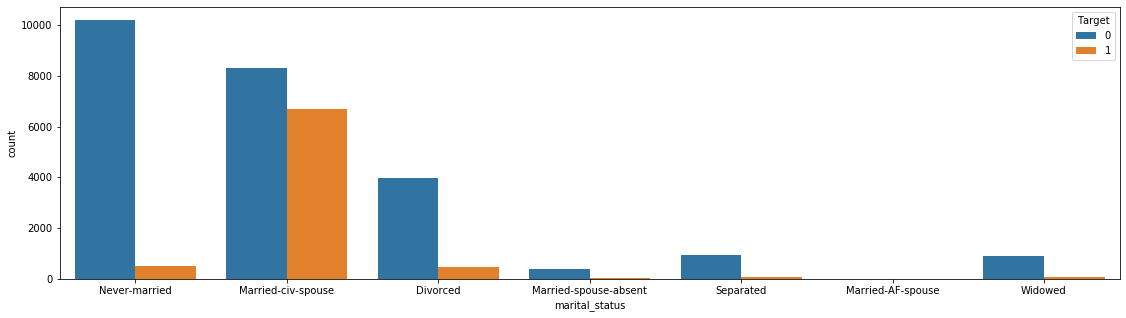

In [9]:
variable_wise_distribution(df, 'marital_status')

- People doing white-collar and professional jobs are highly paid 
- People working as admin and other-services are not paid well and falls in low income group

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,occupation,Target_x,distribution_x,Target_y,distribution_y
4,professional,0,0.159102,1,0.261446
6,white_collar,0,0.084871,1,0.250988
1,blue_collar,0,0.338269,1,0.216809
5,sales,0,0.107888,1,0.125367
3,other_service,0,0.177549,1,0.080602
0,admin_job,0,0.131998,1,0.064660
2,military,0,0.000324,1,0.000128


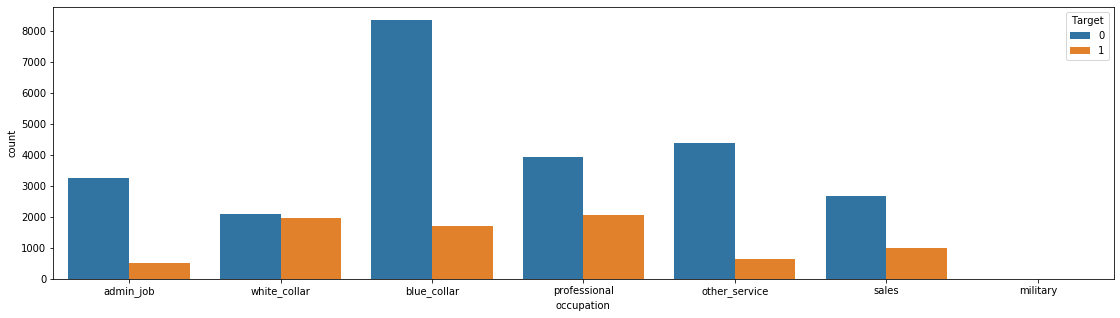

In [10]:
df['occupation'].value_counts(dropna=False)


replace_values = {'Prof-specialty' : 'professional',
                  'Craft-repair' : 'blue_collar', 
                  'Exec-managerial' : 'white_collar',
                  'Adm-clerical' : 'admin_job',
                  'Sales' : 'sales', 
                  'Other-service' : 'other_service',
                  'Machine-op-inspct' : 'blue_collar',
                  '?' : 'professional',
                  'Transport-moving' : 'blue_collar',
                  'Handlers-cleaners' : 'blue_collar',
                  'Farming-fishing' : 'blue_collar', 
                  'Tech-support' : 'other_service', 
                  'Protective-serv' : 'other_service', 
                  'Priv-house-serv' : 'other_service', 
                  'Armed-Forces' : 'military'
                  }

df.replace({'occupation' : replace_values },inplace=True)

variable_wise_distribution(df, 'occupation')

- Families living with their own children has huge contributor in low-income class 'Own-child'

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,relationship,Target_x,distribution_x,Target_y,distribution_y
0,Husband,0,0.294296,1,0.754751
1,Not-in-family,0,0.301335,1,0.109170
5,Wife,0,0.033293,1,0.095013
4,Unmarried,0,0.130583,1,0.027803
3,Own-child,0,0.202306,1,0.008545
2,Other-relative,0,0.038188,1,0.004719


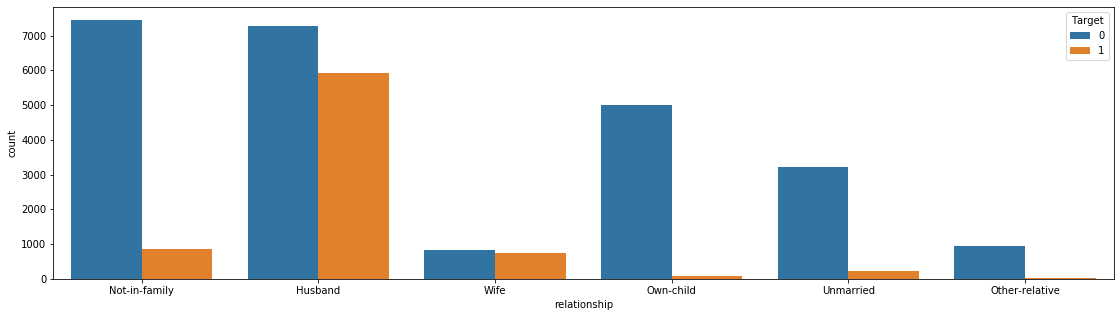

In [11]:
variable_wise_distribution(df, 'relationship')

- Most of the data has white population
- And within each class , imbalance betweeen both the low income and high income is same as other class
- No racial discrimination w.r.t income is seen here

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,race,Target_x,distribution_x,Target_y,distribution_y
3,white,0,0.837338,1,0.907665
1,black,0,0.110720,1,0.049356
0,asian,0,0.030866,1,0.035200
2,others,0,0.021076,1,0.007780


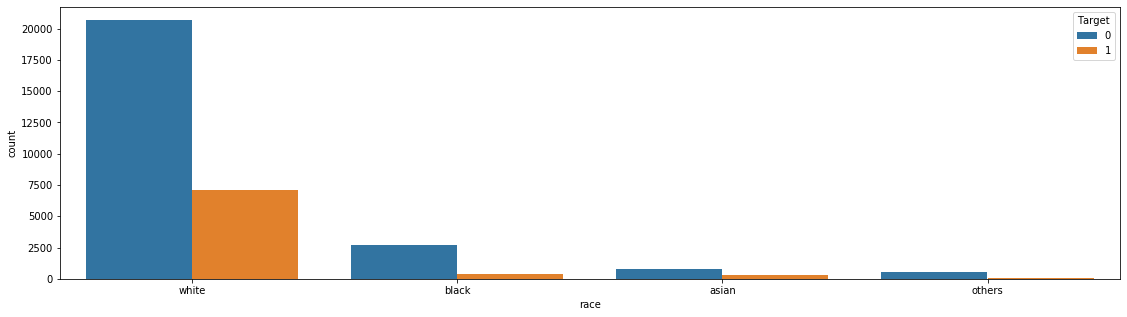

In [12]:
replace_values = {'White' : 'white', 'Black' : 'black', 
                  'Asian-Pac-Islander' : 'asian',
                  'Amer-Indian-Eskimo' : 'others', 'Other' : 'others'}

df.replace({'race' : replace_values },inplace=True)

variable_wise_distribution(df, 'race')

- Huge imbalance is seen in sex variable
- May be more data taken from Male class
- There is no point making any observation here

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,sex,Target_x,distribution_x,Target_y,distribution_y
1,Male,0,0.611974,1,0.849637
0,Female,0,0.388026,1,0.150363


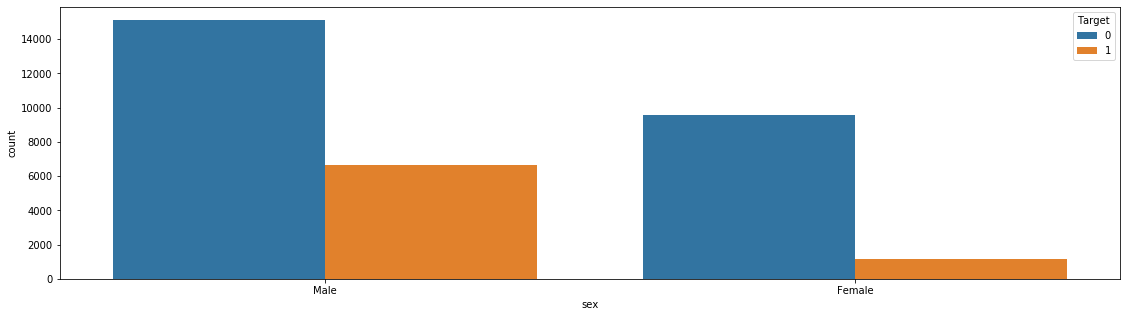

In [13]:
variable_wise_distribution(df, 'sex')

#### Load another dataset 
- To bin countries as per thier respective continent 

In [14]:
continent_data = 'https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv'
cc_df = pd.read_csv(continent_data)
cc_df['Country'] = cc_df['Country'].str.lower()

- lowercase strings in both the datasets and match on country to find continent

In [15]:
df['native_country'] = df['native_country'].str.lower()

continent = []
for i in df['native_country']:
    if i in cc_df['Country'].tolist():
        continent.append(cc_df['Continent'])
len(continent)

2156

In [16]:
df_new = pd.merge(df, cc_df, how='left', left_on=['native_country'], right_on=['Country'])
df_new.shape  # Shape of new dataframe with additional 2 columns 

(32561, 17)

In [17]:
df_new['Continent'].value_counts(dropna=False)

NaN              30405
North America     1095
Asia               600
Europe             402
South America       59
Name: Continent, dtype: int64

- As we can see, there are loads of NaN value in continent column ,
- Its because we didnt map the United States and for some countries , the continent name was not available in our continent dataset
- Hence , we map them manually

In [18]:
df_new['Continent'].fillna(df['native_country'],inplace=True)

In [19]:
replace_values = {'puerto-rico' : 'North America', 'el-salvador' : 'North America',
                  'south' : 'South America', 'columbia' : 'North America', 'england' : 'Europe',
                  'dominican-republic' : 'North America', 'taiwan' : 'Asia', 'hong' : 'Asia',
                  'trinadad&tobago' : 'South America', 'yugoslavia' : 'Europe',
                  'outlying-us(guam-usvi-etc)' : 'South America',
                  'scotland' : 'Europe', 'holand-netherlands' : 'Europe'
                 }

df_new.replace({'Continent' : replace_values },inplace=True)

- Now, we can see we are only left with 583 values , hence we will group them as 'others'

In [20]:
df_new['Continent'].value_counts(dropna=False)

united-states    29170
North America     1444
Asia               671
?                  583
Europe             521
South America      172
Name: Continent, dtype: int64

In [21]:
df_new['Continent'] = np.where(df_new['Continent'] == '?', 'others', df_new['Continent'])

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Continent,Target_x,distribution_x,Target_y,distribution_y
5,united-states,0,0.889927,1,0.914552
0,Asia,0,0.018811,1,0.026272
1,Europe,0,0.014927,1,0.019385
4,others,0,0.017678,1,0.018620
2,North America,0,0.052670,1,0.018110
3,South America,0,0.005987,1,0.003061


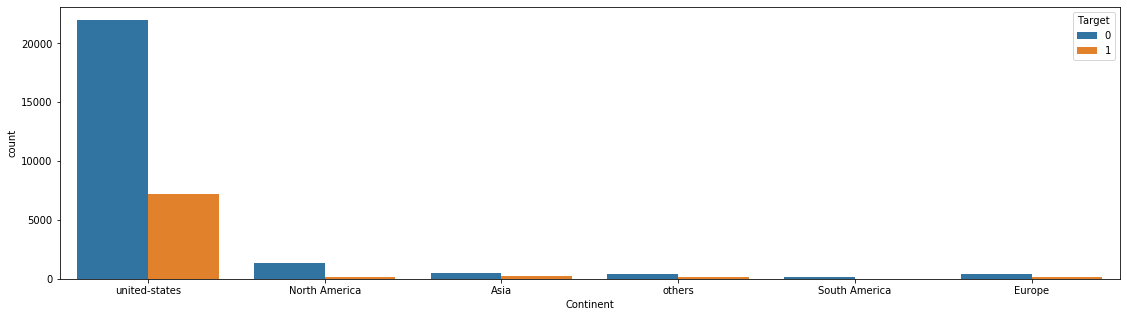

In [22]:
variable_wise_distribution(df_new, 'Continent')

### Binning and Imputation on Numerical Variables

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,age,Target_x,distribution_x,Target_y,distribution_y
2,senior,0,0.232888,1,0.458743
1,middle,0,0.551052,1,0.393572
3,elderly,0,0.118649,1,0.147430
0,young,0,0.097411,1,0.000255


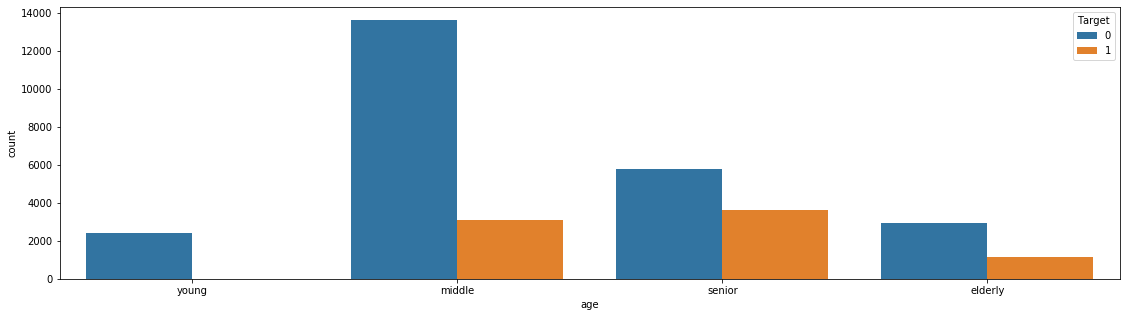

In [23]:
df_new['age'] = pd.cut(x = df_new['age'], bins = [0,20,40,55,200], labels = ["young", "middle", "senior","elderly"])
variable_wise_distribution(df_new, 'age')

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,hours_per_week,Target_x,distribution_x,Target_y,distribution_y
1,full_time,0,0.619377,1,0.475194
2,over_time,0,0.203034,1,0.440250
3,too_much,0,0.028560,1,0.051524
0,part_time,0,0.149029,1,0.033032


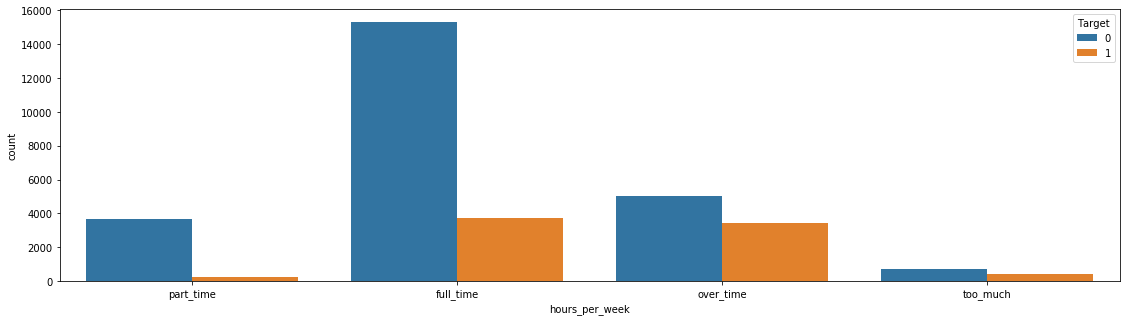

In [24]:
df_new['hours_per_week'] = pd.cut(x = df_new['hours_per_week'], bins = [0,25,40,60,99], labels = ["part_time", "full_time", "over_time","too_much"])
variable_wise_distribution(df_new, 'hours_per_week')

### Some more Feature Engineering
- Now we will do OHE or any other technique to replace categorical values , as binning is complete now
- Also , we will lowercase and remove punctuations within variables

In [25]:
for col in df_new.select_dtypes('object'):
    print(col)

workclass
education
marital_status
occupation
relationship
race
sex
native_country
Continent
Country


- Lowercase values of all columns

In [26]:
#df_new['Continent'].apply(lambda x: x.lower()if x.dtype == "object" else x)

df_new['workclass'] = df_new['workclass'].apply(lambda x: x.lower())
df_new['education'] = df_new['education'].apply(lambda x: x.lower())
df_new['marital_status'] = df_new['marital_status'].apply(lambda x: x.lower())
df_new['occupation'] = df_new['occupation'].apply(lambda x: x.lower())
df_new['relationship'] = df_new['relationship'].apply(lambda x: x.lower())
df_new['race'] = df_new['race'].apply(lambda x: x.lower())
df_new['sex'] = df_new['sex'].apply(lambda x: x.lower())
df_new['Continent'] = df_new['Continent'].apply(lambda x: x.lower())

- Removing extra whitespace and replacing  - hyphen with _ underscore 

In [27]:
df_new['marital_status'] = df_new['marital_status'].replace('\s+', '_',regex=True)
df_new['marital_status'] = df_new['marital_status'].replace('-', '_',regex=True)

df_new['occupation'] = df_new['occupation'].replace('\s+', '_',regex=True)
df_new['occupation'] = df_new['occupation'].replace('-', '_',regex=True)

df_new['relationship'] = df_new['relationship'].replace('\s+', '_',regex=True)
df_new['relationship'] = df_new['relationship'].replace('-', '_',regex=True)

df_new['Continent'] = df_new['Continent'].replace('\s+', '_',regex=True)
df_new['Continent'] = df_new['Continent'].replace('-', '_',regex=True)

In [28]:
df_new.drop(['Country','native_country'],inplace=True, axis=1) # We will drop these 2 columns as we have binned data into Continent column

In [29]:
df_new.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,Target,Continent
0,middle,govt_employee,77516,junior_college,13,never_married,admin_job,not_in_family,white,male,2174.0,0,full_time,0,united_states
1,senior,self_employed,83311,junior_college,13,married_civ_spouse,white_collar,husband,white,male,0.0,0,part_time,0,united_states
2,middle,private,215646,some_school,9,divorced,blue_collar,not_in_family,white,male,0.0,0,full_time,0,united_states
3,senior,private,234721,school_dropout,7,married_civ_spouse,blue_collar,husband,black,male,0.0,0,full_time,0,united_states
4,middle,private,338409,junior_college,13,married_civ_spouse,professional,wife,black,female,0.0,0,full_time,0,north_america


In [30]:
df_copy = df_new.copy()  # Creating a replica copy

#### One Hot Encoding 
- We can also perform Mean Response Encoding , thats also a good technique to play with Categorical data

In [31]:
def one_hot_encoder(orig_df, cat_cols):
    for each_col in cat_cols:
        dummies = pd.get_dummies(orig_df[each_col], prefix=each_col, drop_first=False)
        orig_df = pd.concat([orig_df, dummies], axis=1)
        new_df = orig_df.drop(orig_df[cat_cols],axis=1)
    return new_df

In [32]:
categorical_columns = [col for col in df_new.select_dtypes(object)]
categorical_columns.insert(0, 'age')
categorical_columns.insert(10, 'hours_per_week')
categorical_columns

df_copy_categ = one_hot_encoder(df_copy, categorical_columns)

In [33]:
print(f'Shape of our Old dataset without OHE is : {df_new.shape}')
print(f'Shape of our new dataset after OHE is   : {df_copy_categ.shape}')


Shape of our Old dataset without OHE is : (32561, 15)
Shape of our new dataset after OHE is   : (32561, 55)


In [34]:
df_copy_categ.head()

,fnlwgt,education_num,capital_gain,capital_loss,Target,age_young,age_middle,age_senior,age_elderly,workclass_govt_employee,workclass_private,workclass_self_employed,workclass_unemployed,education_associate_cert,education_doctorate,education_junior_college,education_masters,education_school_dropout,education_some_school,marital_status_divorced,marital_status_married_af_spouse,marital_status_married_civ_spouse,marital_status_married_spouse_absent,marital_status_never_married,marital_status_separated,marital_status_widowed,occupation_admin_job,occupation_blue_collar,occupation_military,occupation_other_service,occupation_professional,occupation_sales,occupation_white_collar,relationship_husband,relationship_not_in_family,relationship_other_relative,relationship_own_child,relationship_unmarried,relationship_wife,race_asian,race_black,race_others,race_white,sex_female,sex_male,Continent_asia,Continent_europe,Continent_north_america,Continent_others,Continent_south_america,Continent_united_states,hours_per_week_part_time,hours_per_week_full_time,hours_per_week_over_time,hours_per_week_too_much
0,77516,13,2174.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
1,83311,13,0.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
2,215646,9,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
3,234721,7,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,338409,13,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0


- As we will perform feature engineering on our numerical data , hence dropping all numerical/real-value data from this categorical df

In [35]:
df_copy_categ = df_copy_categ.drop(['fnlwgt','education_num','capital_gain','capital_loss','Target'],axis=1)
df_copy_categ.shape

(32561, 50)

## Processing Continous Data 
- Null Value Imputation
- Standardisation
- Feature Importance and Selection

In [36]:
df_new.dtypes

age               category
workclass           object
fnlwgt               int64
education           object
education_num        int64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
capital_gain       float64
capital_loss         int64
hours_per_week    category
Target               int64
Continent           object
dtype: object

In [59]:
for col in df_new.select_dtypes(exclude=[object]):   # Selecting only varibles not having object/string as a datatype
    print(col)

age
fnlwgt
education_num
capital_gain
capital_loss
hours_per_week
Target


In [38]:
df_new['capital_gain'] = df_new['capital_gain'].fillna(df_new['capital_gain'].median()) # Null value imputation with median which is more robust than mean

In [39]:
df_continous = df_new[['fnlwgt','education_num','capital_gain','capital_loss','Target']]
df_continous.head()

,fnlwgt,education_num,capital_gain,capital_loss,Target
0,77516,13,2174.0,0,0
1,83311,13,0.0,0,0
2,215646,9,0.0,0,0
3,234721,7,0.0,0,0
4,338409,13,0.0,0,0


#### Feature Importance Real Value Variable

In [40]:
X = df_continous.iloc[:,0:4]
y = df_continous.iloc[:,-1]

best_features = SelectKBest(score_func=chi2, k=3) #extract top 3 best features
fit_chi = best_features.fit(X,y)

chi_scores = pd.DataFrame(fit_chi.scores_)
df_columns = pd.DataFrame(X.columns)

variable_importance = pd.concat([df_columns,chi_scores],axis=1)
variable_importance.columns = ['Columns','Score']  

print(variable_importance.nlargest(5,'Score'))  

         Columns         Score
2   capital_gain  8.219247e+07
3   capital_loss  1.372146e+06
0         fnlwgt  1.711477e+05
1  education_num  2.401422e+03


Shape of new dataset after extracting important features is  : (32561, 1)
Shape of old dataset was :                                     (32561, 4)


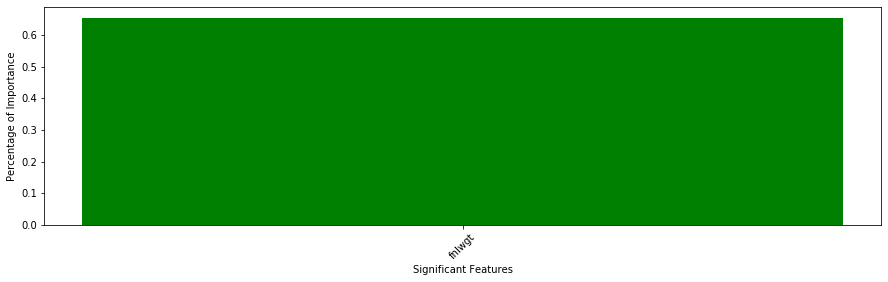

In [41]:
classifier = sklearn.ensemble.ExtraTreesClassifier().fit(X, y)
best_features = SelectFromModel(classifier, prefit=True)
X_Data_new = best_features.transform(X)
print(f'Shape of new dataset after extracting important features is  : {X_Data_new.shape}')
print(f'Shape of old dataset was :                                     {X.shape}')

features = X_Data_new.shape[1]
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

feature_imp = {}
for i in range(features):
    #print(df.columns[2+indices[i]], importances[indices[i]])
    column_name   = df_new.columns[2+indices[i]]
    feature_value = importances[indices[i]]
    feature_imp[column_name] = feature_value


plt.figure(figsize=(15,4))
plt.bar(list(feature_imp.keys()), feature_imp.values(), color='gbry')
plt.ylabel ('Percentage of Importance')
plt.xlabel ('Significant Features')
plt.xticks(rotation=45)
plt.show()

In [42]:
cols = [i for i in df_continous.columns if i!='Target']

# We can't take datetime as a variable here 
vif_score = [variance_inflation_factor(df_new[cols].values, i) for i in range(df_new[cols].shape[1])]
vif_data = pd.Series(vif_score, index=df_new[cols].columns)
vif_data = vif_data.to_frame().reset_index()
vif_data.columns = ['Variable_name', 'VIF_Score']
vif_data.sort_values('VIF_Score',ascending=False,inplace=True)
vif_data

,Variable_name,VIF_Score
1,education_num,3.547361
0,fnlwgt,3.432454
3,capital_loss,1.055069
2,capital_gain,1.032406


#### Standardisation 
- As data is present on differnt scales, its always a good thing to put them on same scale between 0-1.

In [43]:
scaler = StandardScaler()
df_continous.iloc[:,0:-1] = scaler.fit_transform(df_continous.iloc[:,0:-1].to_numpy())
print(df_continous)

         fnlwgt  education_num  capital_gain  capital_loss  Target
0     -1.063611       1.134739      0.148453      -0.21666       0
1     -1.008707       1.134739     -0.145920      -0.21666       0
2      0.245079      -0.420060     -0.145920      -0.21666       0
3      0.425801      -1.197459     -0.145920      -0.21666       0
4      1.408176       1.134739     -0.145920      -0.21666       0
...         ...            ...           ...           ...     ...
32556  0.639741       0.746039     -0.145920      -0.21666       0
32557 -0.335433      -0.420060     -0.145920      -0.21666       1
32558 -0.358777      -0.420060     -0.145920      -0.21666       0
32559  0.110960      -0.420060     -0.145920      -0.21666       0
32560  0.929893      -0.420060      1.888424      -0.21666       1

[32561 rows x 5 columns]


/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Feature Selection 
- On Categorical Data

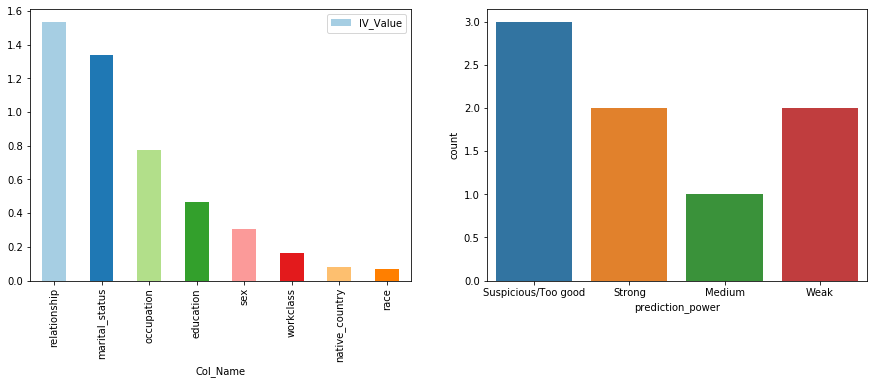

,Col_Name,IV_Value,prediction_power
0,workclass,0.161532,Medium
1,education,0.468326,Strong
6,sex,0.303289,Strong
4,relationship,1.535608,Suspicious/Too good
2,marital_status,1.338829,Suspicious/Too good
3,occupation,0.776228,Suspicious/Too good
7,native_country,0.077957,Weak
5,race,0.069300,Weak


In [125]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Genuine': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            'Fraud': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Genuine'] = dset['Genuine'] / dset['Genuine'].sum()
    dset['Distr_Fraud'] = dset['Fraud'] / dset['Fraud'].sum()
    dset['WoE'] = np.log(dset['Distr_Genuine'] / dset['Distr_Fraud'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['Distr_diff'] = (dset['Distr_Genuine'] - dset['Distr_Fraud'])
    dset['IV'] =dset['Distr_diff']*dset['WoE']
    iv= dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return sum(dset['IV'])
#   return dset[['Value','WoE','IV']]

lst=[]
for col in df.select_dtypes('object'):
    iv = calculate_woe_iv(df, col, 'Target')
    lst.append({'Col_Name': col, 'IV_Value': iv})
dset = pd.DataFrame(lst).sort_values(by='IV_Value',ascending=False)

prediction_power=[]
for i in dset['IV_Value']:
    if (i<0.02):
        prediction_power.append('Useless')
    if (i>0.02 and i<0.1):
        prediction_power.append('Weak')
    if (i>0.1 and i<0.3):
        prediction_power.append('Medium')
    if (i>0.3 and i<0.5):
        prediction_power.append('Strong')
    if (i>0.5):
        prediction_power.append('Suspicious/Too good')
        
dset['prediction_power']=prediction_power

fig, ax =plt.subplots(1,2, figsize=(15,5))
dset.plot(x="Col_Name", y=["IV_Value"], kind="bar",ax=ax[0],color=[plt.cm.Paired(np.arange(len(dset)))])
sns.countplot(data=dset,x='prediction_power',ax=ax[1])
plt.show()

dset.head(15).sort_values(by='prediction_power')

### Chi-square test
- is a non-parametric (distribution-free) method used to compare the relationship between the two categorical           (nominal) variables in a contingency table
- Chi-square test for independence is different than the chi-square goodness-of-fit test
- Null hypotheses: The two categorical variables are independent (no association between the two variables and NOT Significant)
- Alternative hypotheses: The two categorical variables are dependent (there is an association between the two variables)
- There are no one or two-tailed P-value. Rejection region of the chi-square test is always on the right side of the distribution.
- If P<0.05, we conclude that there is a significant association between selected categorical column and target column , column must be taken
- Assumptions :
- The two variables are categorical and data is randomly sampled 
- Observations should be independent of each other
- Observation data should be frequency counts and not percentages or transformed data

In [144]:
significant_columns_categ=[]
non_significant_columns_categ = []
for col in df.select_dtypes('object'):
    dset=pd.crosstab(df['Target'], df[col], margins = True)
    chi2, p_value, dof, exp = stats.chi2_contingency(dset)
    if p_value < 0.05: 
        significant_columns_categ.append({'Variable':col,'p_value':p_value, 'Comment': 'Reject Null Hypothesis, Dependent & Significant Column must be taken'})
    elif p_value > 0.05: 
        non_significant_columns_categ.append({'Variable':col,'p_value':p_value, 'Comment': 'Fail to reject Null Hypothesis, Independent & Non Significant Column AVOID them'})

sig_df=pd.DataFrame(significant_columns_categ).sort_values(by='p_value',ascending=False) 
non_sig_df=pd.DataFrame(non_significant_columns_categ) 

sig_df

,Variable,p_value,Comment
7,native_country,8.563052e-29,"Reject Null Hypothesis, Dependent & Significan..."
5,race,4.432684e-65,"Reject Null Hypothesis, Dependent & Significan..."
0,workclass,1.189792e-210,"Reject Null Hypothesis, Dependent & Significan..."
1,education,0.000000e+00,"Reject Null Hypothesis, Dependent & Significan..."
2,marital_status,0.000000e+00,"Reject Null Hypothesis, Dependent & Significan..."
3,occupation,0.000000e+00,"Reject Null Hypothesis, Dependent & Significan..."
4,relationship,0.000000e+00,"Reject Null Hypothesis, Dependent & Significan..."
6,sex,0.000000e+00,"Reject Null Hypothesis, Dependent & Significan..."


- Heat Map to see Corelation between data

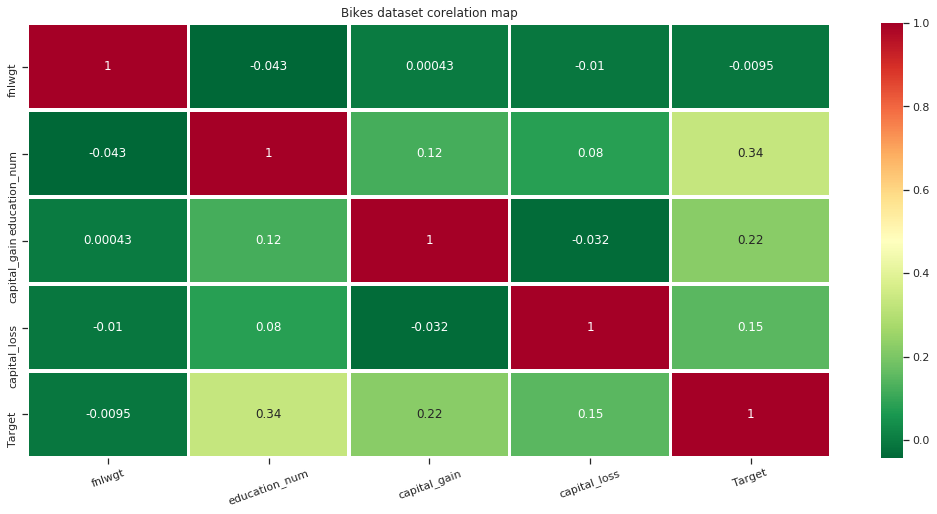

In [107]:
census_df = df_new.corr()                                  
plt.figure(figsize = (18,8))
sns.heatmap(census_df, annot=True, cmap='RdYlGn_r', linewidths=2.5)
plt.xticks(rotation = 20)
plt.title("Bikes dataset corelation map")
plt.show()

In [44]:
df_copy_categ.head()

,age_young,age_middle,age_senior,age_elderly,workclass_govt_employee,workclass_private,workclass_self_employed,workclass_unemployed,education_associate_cert,education_doctorate,education_junior_college,education_masters,education_school_dropout,education_some_school,marital_status_divorced,marital_status_married_af_spouse,marital_status_married_civ_spouse,marital_status_married_spouse_absent,marital_status_never_married,marital_status_separated,marital_status_widowed,occupation_admin_job,occupation_blue_collar,occupation_military,occupation_other_service,occupation_professional,occupation_sales,occupation_white_collar,relationship_husband,relationship_not_in_family,relationship_other_relative,relationship_own_child,relationship_unmarried,relationship_wife,race_asian,race_black,race_others,race_white,sex_female,sex_male,Continent_asia,Continent_europe,Continent_north_america,Continent_others,Continent_south_america,Continent_united_states,hours_per_week_part_time,hours_per_week_full_time,hours_per_week_over_time,hours_per_week_too_much
0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [45]:
df_continous.head()

,fnlwgt,education_num,capital_gain,capital_loss,Target
0,-1.063611,1.134739,0.148453,-0.21666,0
1,-1.008707,1.134739,-0.145920,-0.21666,0
2,0.245079,-0.420060,-0.145920,-0.21666,0
3,0.425801,-1.197459,-0.145920,-0.21666,0
4,1.408176,1.134739,-0.145920,-0.21666,0


In [46]:
print(df_copy_categ.shape)
print(df_continous.shape)

(32561, 50)
(32561, 5)


#### Concatinating both Categorical (OHE) and Numerical (Standardised) data

In [44]:
final_df = pd.concat([df_copy_categ,df_continous], axis =1)
final_df.shape

(32561, 55)

### Train Test Split Dataset

In [45]:
x = final_df.drop('Target',axis=1)
y = final_df['Target']

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,stratify=y,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape, y_test.shape)

(22792, 54) (9769, 54) (22792,) (9769,)


### XGB Classifier

[17:19:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:19:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:19:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:19:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:19:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:19:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:19:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:19:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=3
[17:19:31] /work

[17:19:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:19:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:19:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:19:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:19:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[17:19:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:19:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:19:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:19:33] /worksp

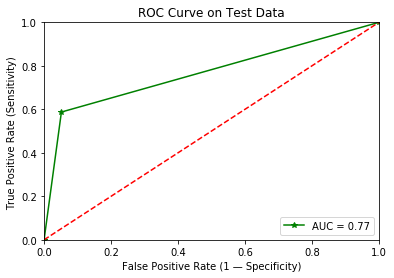

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from xgboost import XGBClassifier


model= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
       silent=None, subsample=0.6, verbosity=1)


model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('/n')

print("Score of Training data: ", model.score(x_train, y_train))
print("Score of Testing data: ", model.score(x_test, y_test))

print('/n')

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, marker='*',color='g')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity) ')
plt.xlabel('False Positive Rate (1 — Specificity)')
plt.title('ROC Curve on Test Data')
plt.show()

### Train and Test Model on Best Selected Features

In [55]:
import sklearn.feature_selection

select_best_features = sklearn.feature_selection.SelectKBest(k=30)

fit_chi = select_best_features.fit(x_train, y_train)

chi_scores = pd.DataFrame(fit_chi.scores_)
df_columns = pd.DataFrame(x_train.columns)

indices_selected = fit_chi.get_support(indices=True)
colnames_selected = [x_train.columns[i] for i in indices_selected]

X_train_selected = x_train[colnames_selected]    # Now this will become our new x_train and x_test
X_test_selected = x_test[colnames_selected]

variable_importance = pd.concat([df_columns,chi_scores],axis=1)
variable_importance.columns = ['Columns','Score']  

print(variable_importance.nlargest(10,'Score'))  

                              Columns        Score
16  marital_status_married_civ_spouse  5570.357437
28               relationship_husband  4236.910726
51                      education_num  2897.931185
18       marital_status_never_married  2583.025617
48           hours_per_week_over_time  1271.320995
31             relationship_own_child  1256.769708
52                       capital_gain  1194.465408
27            occupation_white_collar  1098.651673
2                          age_senior  1093.313019
39                           sex_male  1073.849167


In [57]:
variable_importance.shape

(54, 2)

[17:25:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:25:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:25:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:25:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:25:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:25:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:25:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:25:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:25:12] /work

[17:25:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:25:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:25:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:25:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:25:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=3
[17:25:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:25:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[17:25:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:25:13] /worksp

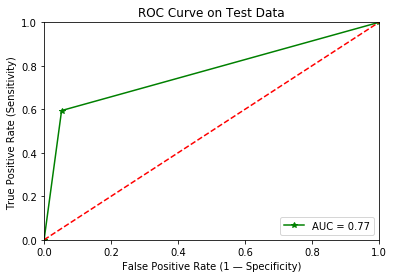

In [62]:
model= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
       silent=None, subsample=0.6, verbosity=1)


model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

print('/n')

print("Score of Training data: ", model.score(X_train_selected, y_train))
print("Score of Testing data: ", model.score(X_test_selected, y_test))

print('/n')

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, marker='*',color='g')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity) ')
plt.xlabel('False Positive Rate (1 — Specificity)')
plt.title('ROC Curve on Test Data')
plt.show()

### Principal Component Analysis 
- Transforms a dataset of all features into principal components which internally  "summarize" the variance with most important variables called Principal Components.
- Each PC , finds the linear combination of features that maximizes variance.
- Also ensures zero correlation with the previously calculated PC's , as they are independent and orthogonal to eachother.
- But it makes models a lot harder to interpret

In [49]:
x = final_df.drop('Target',axis=1)
y = final_df['Target']

In [57]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [51]:
pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(x))
print(X_pca.shape)
X_pca.head()

(32561, 10)


,0,1,2,3,4,5,6,7,8,9
0,1.075785,0.075858,-1.167328,-0.875693,0.224470,-0.675420,0.575129,-0.270020,0.809238,-0.341096
1,1.543061,-0.269402,-0.864012,0.251344,-1.125828,0.474893,-0.724791,-0.522146,0.316616,0.265822
2,-0.834678,0.142361,0.123292,0.020276,0.079053,-0.396207,0.788427,1.023110,0.470143,-0.760380
3,-1.199719,0.037412,0.594018,1.242482,-0.638049,0.577098,0.276615,-0.623803,0.399830,-0.249700
4,0.506272,0.603826,1.093052,-1.558489,-0.140920,0.450744,0.693915,-0.724352,-1.121387,-0.109754


In [55]:
x_train_pca, x_test_pca, y_train, y_test =train_test_split(X_pca,y,test_size=0.3,stratify=y,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape, y_test.shape)

(22792, 10) (9769, 10) (22792,) (9769,)


[10:25:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:32] /work

[10:25:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[10:25:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:25:33] /works

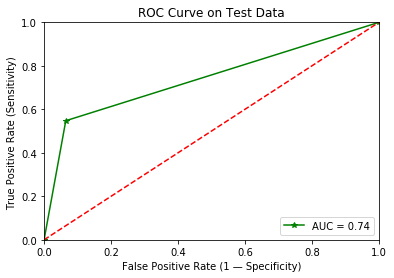

In [58]:
model= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
       silent=None, subsample=0.6, verbosity=1)


model.fit(x_train_pca, y_train)

y_pred = model.predict(x_test_pca)

print('/n')

print("Score of Training data: ", model.score(x_train_pca, y_train))
print("Score of Testing data: ", model.score(x_test_pca, y_test))

print('/n')

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, marker='*',color='g')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity) ')
plt.xlabel('False Positive Rate (1 — Specificity)')
plt.title('ROC Curve on Test Data')
plt.show()

### Conclusion

In [14]:
from tabulate import tabulate

print(tabulate([
                ["XGBoost" ,"Normal", 86.46, 86.13], 
                ["XGBoost" ,"SelectKBest Features", 86.26, 86.26], 
                ["XGBoost" ,"PCA", 85.35, 84.18]
               ], 
               headers=["Algorithm", "Technique", "Accuracy_Train_data", "Accuracy_Test_data"]))

Algorithm    Technique               Accuracy_Train_data    Accuracy_Test_data
-----------  --------------------  ---------------------  --------------------
XGBoost      Normal                                86.46                 86.13
XGBoost      SelectKBest Features                  86.26                 86.26
XGBoost      PCA                                   85.35                 84.18
